<a href="https://colab.research.google.com/github/Nitin1901/Word-Embeddings/blob/master/Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print(tf.__version__)

2.3.0


In [2]:
import tensorflow_datasets as tfds

imdb, info = tfds.load("imdb_reviews", with_info = True, as_supervised = True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete72GZNN/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete72GZNN/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete72GZNN/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
train_data, test_data = imdb['train'], imdb['test']

In [27]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [28]:
for s, l in train_data:
    training_sentences.append(s.numpy().decode('utf8'))
    training_labels.append(l.numpy())

for s, l in test_data:
    testing_sentences.append(s.numpy().decode('utf8'))
    testing_labels.append(l.numpy())

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [29]:
print(type(training_sentences), type(training_labels))

<class 'list'> <class 'numpy.ndarray'>


In [31]:
vocab_size = [10000, 20000, 30000]
embedding_dim = 16
maxlen = [50, 100, 150]
oov_tok = '<OOV>'

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Epoch 1/20
782/782 [==============================] - 7s 8ms/step - loss: 0.5626 - accuracy: 0.6916 - val_loss: 0.4864 - val_accuracy: 0.7626
Epoch 2/20
782/782 [==============================] - 7s 9ms/step - loss: 0.3283 - accuracy: 0.8625 - val_loss: 0.5317 - val_accuracy: 0.7498
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 0.1327 - accuracy: 0.9590 - val_loss: 0.7334 - val_accuracy: 0.7263
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0278 - accuracy: 0.9959 - val_loss: 0.9147 - val_accuracy: 0.7270
Epoch 5/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0061 - accuracy: 0.9996 - val_loss: 1.0401 - val_accuracy: 0.7284
Epoch 6/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.1301 - val_accuracy: 0.7323
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 9.0517e-04 - accuracy: 1.0000 - val_loss: 1.2118 - val_accuracy: 0.7325
Ep

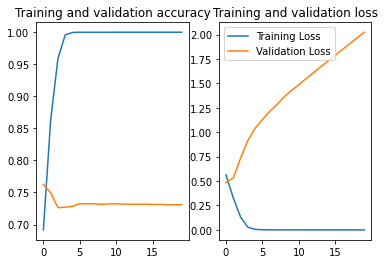

Epoch 1/20
782/782 [==============================] - 7s 8ms/step - loss: 0.4911 - accuracy: 0.7431 - val_loss: 0.4264 - val_accuracy: 0.7999
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 0.2372 - accuracy: 0.9082 - val_loss: 0.4778 - val_accuracy: 0.7894
Epoch 3/20
782/782 [==============================] - 7s 8ms/step - loss: 0.0720 - accuracy: 0.9818 - val_loss: 0.6092 - val_accuracy: 0.7918
Epoch 4/20
782/782 [==============================] - 7s 8ms/step - loss: 0.0133 - accuracy: 0.9987 - val_loss: 0.7192 - val_accuracy: 0.7885
Epoch 5/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0028 - accuracy: 0.9998 - val_loss: 0.7977 - val_accuracy: 0.7890
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 9.2071e-04 - accuracy: 1.0000 - val_loss: 0.8566 - val_accuracy: 0.7910
Epoch 7/20
782/782 [==============================] - 7s 9ms/step - loss: 4.5359e-04 - accuracy: 1.0000 - val_loss: 0.9075 - val_accuracy: 0.792

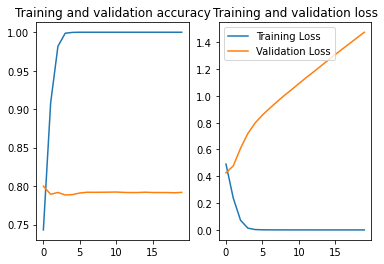

Epoch 1/20
782/782 [==============================] - 7s 9ms/step - loss: 0.4590 - accuracy: 0.7604 - val_loss: 0.3715 - val_accuracy: 0.8353
Epoch 2/20
782/782 [==============================] - 7s 9ms/step - loss: 0.2008 - accuracy: 0.9269 - val_loss: 0.4043 - val_accuracy: 0.8274
Epoch 3/20
782/782 [==============================] - 8s 10ms/step - loss: 0.0565 - accuracy: 0.9865 - val_loss: 0.5346 - val_accuracy: 0.8208
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0109 - accuracy: 0.9986 - val_loss: 0.6164 - val_accuracy: 0.8209
Epoch 5/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.6877 - val_accuracy: 0.8224
Epoch 6/20
782/782 [==============================] - 7s 8ms/step - loss: 8.3895e-04 - accuracy: 1.0000 - val_loss: 0.7397 - val_accuracy: 0.8243
Epoch 7/20
782/782 [==============================] - 7s 9ms/step - loss: 4.2643e-04 - accuracy: 1.0000 - val_loss: 0.7853 - val_accuracy: 0.82

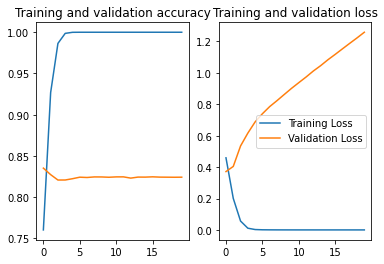

Epoch 1/20
782/782 [==============================] - 7s 9ms/step - loss: 0.5570 - accuracy: 0.6915 - val_loss: 0.4863 - val_accuracy: 0.7623
Epoch 2/20
782/782 [==============================] - 7s 9ms/step - loss: 0.2834 - accuracy: 0.8858 - val_loss: 0.5658 - val_accuracy: 0.7401
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0762 - accuracy: 0.9794 - val_loss: 0.7703 - val_accuracy: 0.7288
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0120 - accuracy: 0.9990 - val_loss: 0.9097 - val_accuracy: 0.7294
Epoch 5/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0031 - accuracy: 0.9998 - val_loss: 0.9987 - val_accuracy: 0.7312
Epoch 6/20
782/782 [==============================] - 7s 9ms/step - loss: 9.6639e-04 - accuracy: 1.0000 - val_loss: 1.0748 - val_accuracy: 0.7317
Epoch 7/20
782/782 [==============================] - 7s 9ms/step - loss: 4.9230e-04 - accuracy: 1.0000 - val_loss: 1.1403 - val_accuracy: 0.732

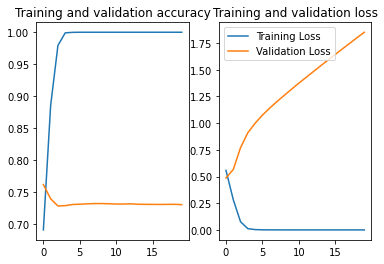

Epoch 1/20
782/782 [==============================] - 7s 9ms/step - loss: 0.4944 - accuracy: 0.7389 - val_loss: 0.4086 - val_accuracy: 0.8129
Epoch 2/20
782/782 [==============================] - 7s 9ms/step - loss: 0.2010 - accuracy: 0.9263 - val_loss: 0.4792 - val_accuracy: 0.7936
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0412 - accuracy: 0.9918 - val_loss: 0.6168 - val_accuracy: 0.7883
Epoch 4/20
782/782 [==============================] - 8s 10ms/step - loss: 0.0061 - accuracy: 0.9996 - val_loss: 0.6912 - val_accuracy: 0.7926
Epoch 5/20
782/782 [==============================] - 8s 10ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.7510 - val_accuracy: 0.7941
Epoch 6/20
782/782 [==============================] - 7s 9ms/step - loss: 6.3039e-04 - accuracy: 1.0000 - val_loss: 0.8012 - val_accuracy: 0.7945
Epoch 7/20
782/782 [==============================] - 7s 9ms/step - loss: 3.3440e-04 - accuracy: 1.0000 - val_loss: 0.8447 - val_accuracy: 0.7

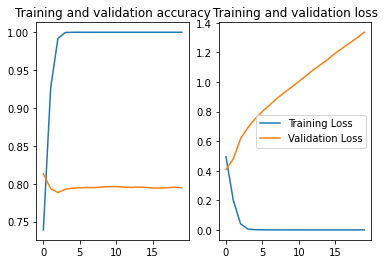

Epoch 1/20
782/782 [==============================] - 8s 10ms/step - loss: 0.4432 - accuracy: 0.7790 - val_loss: 0.3604 - val_accuracy: 0.8407
Epoch 2/20
782/782 [==============================] - 8s 10ms/step - loss: 0.1655 - accuracy: 0.9428 - val_loss: 0.4310 - val_accuracy: 0.8220
Epoch 3/20
782/782 [==============================] - 8s 10ms/step - loss: 0.0342 - accuracy: 0.9926 - val_loss: 0.5569 - val_accuracy: 0.8153
Epoch 4/20
782/782 [==============================] - 8s 10ms/step - loss: 0.0057 - accuracy: 0.9995 - val_loss: 0.6120 - val_accuracy: 0.8212
Epoch 5/20
782/782 [==============================] - 8s 10ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6632 - val_accuracy: 0.8221
Epoch 6/20
782/782 [==============================] - 7s 9ms/step - loss: 5.4995e-04 - accuracy: 1.0000 - val_loss: 0.7047 - val_accuracy: 0.8228
Epoch 7/20
782/782 [==============================] - 7s 9ms/step - loss: 2.9488e-04 - accuracy: 1.0000 - val_loss: 0.7439 - val_accuracy: 

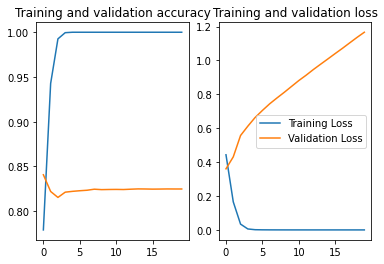

Epoch 1/20
782/782 [==============================] - 8s 11ms/step - loss: 0.5546 - accuracy: 0.7008 - val_loss: 0.4807 - val_accuracy: 0.7654
Epoch 2/20
782/782 [==============================] - 8s 11ms/step - loss: 0.2788 - accuracy: 0.8897 - val_loss: 0.5620 - val_accuracy: 0.7430
Epoch 3/20
782/782 [==============================] - 9s 12ms/step - loss: 0.0731 - accuracy: 0.9818 - val_loss: 0.7473 - val_accuracy: 0.7308
Epoch 4/20
782/782 [==============================] - 9s 11ms/step - loss: 0.0127 - accuracy: 0.9985 - val_loss: 0.8861 - val_accuracy: 0.7308
Epoch 5/20
782/782 [==============================] - 8s 11ms/step - loss: 0.0025 - accuracy: 0.9999 - val_loss: 0.9861 - val_accuracy: 0.7313
Epoch 6/20
782/782 [==============================] - 8s 11ms/step - loss: 8.8606e-04 - accuracy: 1.0000 - val_loss: 1.0595 - val_accuracy: 0.7322
Epoch 7/20
782/782 [==============================] - 8s 11ms/step - loss: 4.5324e-04 - accuracy: 1.0000 - val_loss: 1.1196 - val_accuracy

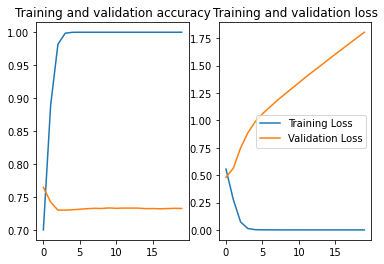

Epoch 1/20
782/782 [==============================] - 8s 11ms/step - loss: 0.4901 - accuracy: 0.7438 - val_loss: 0.4018 - val_accuracy: 0.8163
Epoch 2/20
782/782 [==============================] - 8s 10ms/step - loss: 0.1898 - accuracy: 0.9301 - val_loss: 0.4769 - val_accuracy: 0.7961
Epoch 3/20
782/782 [==============================] - 8s 11ms/step - loss: 0.0338 - accuracy: 0.9932 - val_loss: 0.6037 - val_accuracy: 0.7947
Epoch 4/20
782/782 [==============================] - 8s 10ms/step - loss: 0.0051 - accuracy: 0.9996 - val_loss: 0.6913 - val_accuracy: 0.7938
Epoch 5/20
782/782 [==============================] - 8s 10ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.7508 - val_accuracy: 0.7944
Epoch 6/20
782/782 [==============================] - 8s 11ms/step - loss: 5.7343e-04 - accuracy: 1.0000 - val_loss: 0.7921 - val_accuracy: 0.7962
Epoch 7/20
782/782 [==============================] - 9s 11ms/step - loss: 2.9656e-04 - accuracy: 1.0000 - val_loss: 0.8326 - val_accuracy

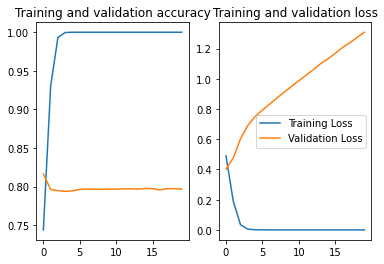

Epoch 1/20
782/782 [==============================] - 10s 13ms/step - loss: 0.4507 - accuracy: 0.7703 - val_loss: 0.3600 - val_accuracy: 0.8408
Epoch 2/20
782/782 [==============================] - 9s 12ms/step - loss: 0.1527 - accuracy: 0.9453 - val_loss: 0.4376 - val_accuracy: 0.8204
Epoch 3/20
782/782 [==============================] - 9s 12ms/step - loss: 0.0260 - accuracy: 0.9950 - val_loss: 0.5391 - val_accuracy: 0.8201
Epoch 4/20
782/782 [==============================] - 9s 12ms/step - loss: 0.0048 - accuracy: 0.9996 - val_loss: 0.6018 - val_accuracy: 0.8201
Epoch 5/20
782/782 [==============================] - 9s 12ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.6522 - val_accuracy: 0.8211
Epoch 6/20
782/782 [==============================] - 9s 11ms/step - loss: 4.7751e-04 - accuracy: 1.0000 - val_loss: 0.6902 - val_accuracy: 0.8229
Epoch 7/20
782/782 [==============================] - 9s 11ms/step - loss: 2.5586e-04 - accuracy: 1.0000 - val_loss: 0.7252 - val_accurac

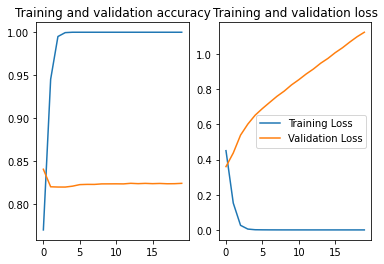

In [32]:
for v_s in vocab_size:

    tokenizer = Tokenizer(num_words=v_s, oov_token=oov_tok)
    tokenizer.fit_on_texts(training_sentences)
    word_index = tokenizer.word_index
    train_sequence = tokenizer.texts_to_sequences(training_sentences)

    for m_l in maxlen:

        train_padded = pad_sequences(train_sequence, maxlen=m_l, padding='post', truncating='post')
        test_sequence = tokenizer.texts_to_sequences(testing_sentences)
        test_padded = pad_sequences(test_sequence, maxlen=m_l, padding='post', truncating='post')

        model = tf.keras.Sequential([
            tf.keras.layers.Embedding(v_s, embedding_dim, input_length=m_l),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
        model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

        history = model.fit(train_padded, training_labels, validation_data = (test_padded, testing_labels), epochs = 20)

        print('\n\n#################################################')
        print(f'Model when vocab_size = {v_s} and maxlen = {m_l}')
        print('#################################################\n')

        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        epochs = range(len(acc))

        plt.subplot(121)

        plt.plot(epochs, acc, label='Training accuracy')
        plt.plot(epochs, val_acc, label='Validation accuracy')
        plt.title('Training and validation accuracy')

        plt.subplot(122)

        plt.plot(epochs, loss, label='Training Loss')
        plt.plot(epochs, val_loss, label='Validation Loss')
        plt.title('Training and validation loss')
        plt.legend()

        plt.show()